In [1]:
%load_ext autoreload
import datetime
# import ete3
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import re
import xml.etree.ElementTree as ET
import xml.dom.minidom
# import xmlschema

In [95]:
%autoreload
from maxes.xes_loader2 import XesLoader, XesLog
# from maxes.xes_file import XesFile
# from maxes.print_xes_info import PrintXesInfo
import maxes.analyze_sequence
import maxes.serialization.serialize
# import maxes.graphs
# import maxes.utils
from maxes.generators.xes_generator1 import XesGenerator1

In [ ]:
import logging
import importlib

def setup_logging():
    # TODO: use __vsc_ipynb_file__
    importlib.reload(logging)
    filename_timestamp_part = datetime.datetime.now().strftime("%Y_%m_%d__%H_%M_%S")
    filename = f"/vt/md/maxes/maxes/output/logs/notebooks/{filename_timestamp_part}.log"
    logging.basicConfig(
        filename=filename,
        filemode="a",
        format="%(asctime)s %(message)s",
        level=logging.DEBUG)
    logging.info("START")

setup_logging()

In [7]:
REGEX_EXTRACT_ATTR_FROM_FEATURE_NAME = re.compile(r'^attr__([a-zA-Z0-9\-_]+)$')

In [9]:
REGEX_EXTRACT_ATTR_FROM_FEATURE_NAME.findall("attr__test_")

['_test_']

In [ ]:
# source_file_path = "/vt/md/maxes/maxes/data/Activities of daily living of several individuals_1_all/data/activitylog_uci_detailed_labour.xes/activitylog_uci_detailed_labour.xes"
source_file_path = "/vt/md/maxes/maxes/data/Conformance Checking Challenge 2019 (CCC19)_1_all/data/CCC19 - Log XES.xes"
loader = XesLoader({ "drop_timezones": True })

logging.info("Loading")
log = loader.load(source_file_path)

if len(loader.errors):
    raise RuntimeError("Errors while loading XES")

# logging.info("Creating dataframes")
# for trace in log.traces:
#     trace.update_df()

logging.info("Fitting")
generator = XesGenerator1(debug=True)
generator.fit(log)

In [92]:
# generator._event_feature_dependency_graph.nodes.data("model")
generator._event_feature_dependency_graph.nodes["attribute__VIDEOEND"]["model"].sample(30)
# from maxes.models.simple_categorical_feature_picker import SimpleCategoricalFeaturePicker
# from collections import defaultdict

# model = SimpleCategoricalFeaturePicker()
# X = generator.df[["attribute__STAGE"]].to_numpy()

# counts = defaultdict(lambda: 0)
# for case in X:
#     counts[case[0]] += 1
# dict(counts)
# model.fit(X)
# model.sample(10)
# generator._event_feature_dependency_graph.nodes

['1056',
 '910',
 '921',
 '203',
 '1234',
 '1882',
 '305',
 '162',
 '596',
 '588',
 '345',
 '957',
 '432',
 '810',
 '198',
 '676',
 '771',
 '850',
 '1098',
 '974',
 '1397',
 '471',
 '452',
 '810',
 '1192',
 '1084',
 '1315',
 '555',
 '759',
 '73']

In [59]:
# generator.trace_dfs[0].rename(mapper={"concept:name": "attr__concept:name"}, inplace=True)
# generator.trace_dfs[0].rename(columns={"concept:name": "attr__concept:name"}, inplace=False)
# generator.trace_dfs[0]
df = generator.df
df
# new_df = pd.DataFrame()
# new_df["attribute__time:timestamp"] = df["attribute__time:timestamp"]
# new_df["attribute__time:timestamp_shifted"] = df["attribute__time:timestamp"].shift(1)
# new_df["delta"] = df["attribute__time:timestamp"] - df.shift(1)["attribute__time:timestamp"]
# new_df
# df["attribute__time:timestamp"] - df["attribute__time:timestamp"].shift(1)
# df["attribute__time:timestamp"] - df.shift(1)["attribute__time:timestamp"]

,attribute__concept:name,attribute__lifecycle:transition,attribute__org:resource,attribute__time:timestamp,attribute__RESOURCE,attribute__ROUND,attribute__EVENTID,attribute__ACTIVITY,attribute__STAGE,attribute__VIDEOSTART,attribute__VIDEOEND,meta__event_transition_duration
0,Hand washing,start,R_13_1C,2018-10-11 12:00:00+00:00,R_13_1C,Pre,1539301115461,Hand washing,Operator and Patient Preparation,55,67,NaT
1,Hand washing,complete,R_13_1C,2018-10-11 12:01:00+00:00,R_13_1C,Pre,1539301115461,Hand washing,Operator and Patient Preparation,55,67,0 days 00:01:00
2,Ultrasound configuration,start,R_13_1C,2018-10-11 12:01:00+00:00,R_13_1C,Pre,1539301145312,Ultrasound configuration,Ultrasound Preparation,84,137,0 days 00:00:00
3,Ultrasound configuration,complete,R_13_1C,2018-10-11 12:02:00+00:00,R_13_1C,Pre,1539301145312,Ultrasound configuration,Ultrasound Preparation,84,137,0 days 00:01:00
4,Anatomic identification,start,R_13_1C,2018-10-11 12:02:00+00:00,R_13_1C,Pre,1539301204591,Anatomic identification,Locate Structures,143,143,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
67,Remove guidewire,complete,R_48_2D,2018-10-17 16:16:00+00:00,R_48_2D,Pre,1539832239808,Remove guidewire,Install Catheter,963,966,0 days 00:00:00
68,Check flow and reflow,start,R_48_2D,2018-10-17 16:16:00+00:00,R_48_2D,Pre,1539832243182,Check flow and reflow,Install Catheter,968,994,0 days 00:00:00
69,Check flow and reflow,complete,R_48_2D,2018-10-17 16:16:00+00:00,R_48_2D,Pre,1539832243182,Check flow and reflow,Install Catheter,968,994,0 days 00:00:00
70,Check catheter position,start,R_48_2D,2018-10-17 16:16:00+00:00,R_48_2D,Pre,1539832264783,Check catheter position,Install Catheter,1001,1001,0 days 00:00:00


In [46]:
g = nx.DiGraph()
g.add_node("a", hello=1)
[[node] for node in g.nodes.values("hello")]

TypeError: Mapping.values() takes 1 positional argument but 2 were given

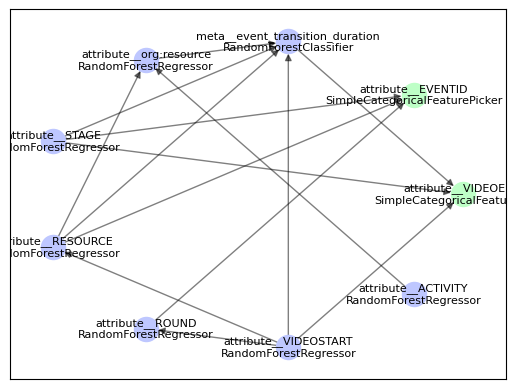

In [91]:
def draw_event_feature_dependency_graph(graph):
    fig, ax = plt.subplots()
    # pos = nx.shell_layout(graph)
    pos = nx.circular_layout(graph)

    # nx.draw_networkx(graph, pos, ax=ax)

    # Nodes
    nodelist_independent_features = [feature
                                     for feature, out_degree in graph.out_degree()
                                     if out_degree == 0]
    nx.draw_networkx_nodes(graph, pos, ax=ax, nodelist=nodelist_independent_features, node_shape="o", node_color="#BEFFC7")

    nodelist_dependent_features = [feature
                                     for feature, out_degree in graph.out_degree()
                                     if out_degree != 0]
    nx.draw_networkx_nodes(graph, pos, ax=ax, nodelist=nodelist_dependent_features, node_shape="o", node_color="#BEC7FF")

    # Edges
    nx.draw_networkx_edges(graph, pos, ax=ax, alpha=0.5)

    # Node labels
    node_labels = {node: f"{node}\n{data["model"].__class__.__name__}"
                   for node, data in graph.nodes.items()}
    nx.draw_networkx_labels(graph, pos, ax=ax, labels=node_labels, font_size=8)

draw_event_feature_dependency_graph(generator._event_feature_dependency_graph)